# **Twitter Sentiment Analysis**

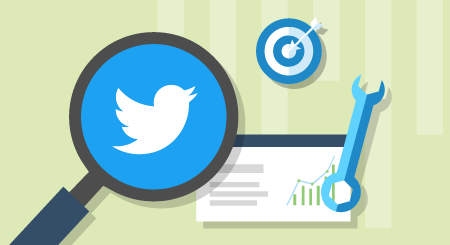

# **Dataset: Sentiment140**

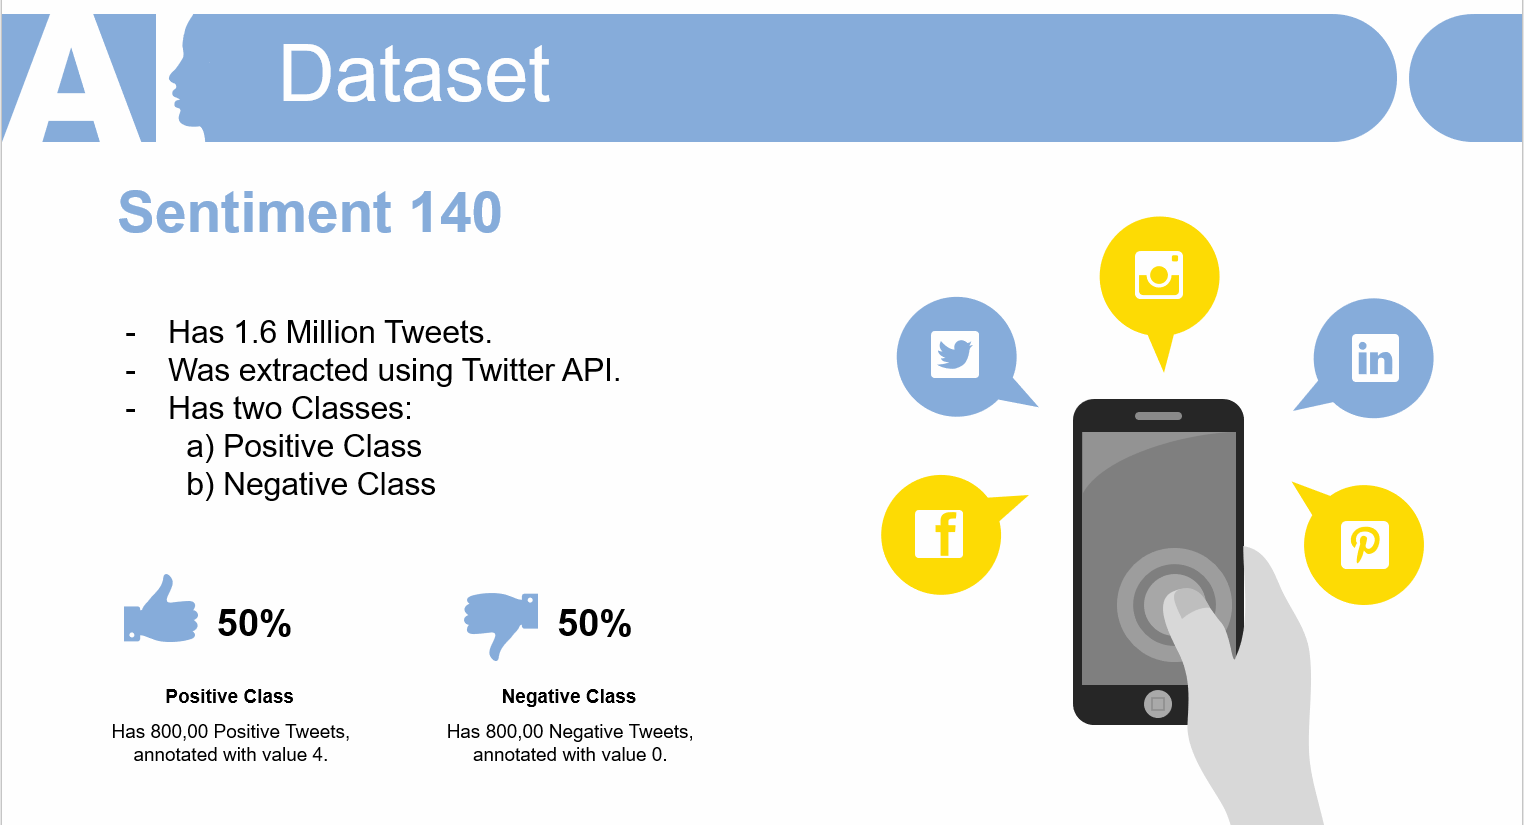

# **Install Libraries**

In [ ]:
#PyDrive is used to connect to Google Drive for importing Dataset, trained Models
!pip install PyDrive
#Gensim is a Memory efficient NLP Library, used for word2Vec Model creation
!pip install gensim
#Wordcloud is used for plotting wordClouds
!pip install wordcloud

# **Importing Modules**

In [ ]:
#Required Modules
#re-regex library, used for performing string substitution functions like removing usernames, links, emoticons.
import re
import string
import numpy as np
import pandas as pd
#csv library is used for reading .csv files 
import csv
from csv import reader
#pydrive library used to connect to Google Drive for importing Dataset, trained Models
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#nltk library is used for importing stopwords and Stemmer
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
#Gensim is a memory efficient library used for creating word2Vec Model and Corpus
import gensim
from gensim import corpora
import itertools
from collections import defaultdict
#matplot library is used for plotting Graphs
import matplotlib.pyplot as plt
from matplotlib import pyplot
#wordcloud library is used for creating WordClouds for EDA
from wordcloud import WordCloud
#sklearn is a ML library which is used here to perform PCA and Label Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#pickle is used to save/load model
import pickle
#Import feature engineering modules and test_train_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
#Import classification algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
#Import modules to calculate accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
#Utitlity Modules
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
#Import bokeh for visualization
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Google** **Authorization**

In [ ]:
#Google Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Access Google Drive
data = drive.CreateFile({'id':"1-BktOhkDeCD4S7B38R3Ri9JI7-AR1_Qh"})
data.GetContentFile("twitterReviews.csv")

In [ ]:
#Convert .csv to a dataframe
df = pd.read_csv('twitterReviews.csv', engine='python', names=["Score","Id", "Time", "Query", "Username","Tweet"])
print(df)

         Score  ...                                              Tweet
0            0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1            0  ...  is upset that he can't update his Facebook by ...
2            0  ...  @Kenichan I dived many times for the ball. Man...
3            0  ...    my whole body feels itchy and like its on fire 
4            0  ...  @nationwideclass no, it's not behaving at all....
...        ...  ...                                                ...
1599995      4  ...  Just woke up. Having no school is the best fee...
1599996      4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997      4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998      4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999      4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 6 columns]


# **Text Cleaning**

In [ ]:
#Text Cleaning
#Removing Irrelevant Features i.e Id, Time, Query and Username.
df = df.drop(['Id', 'Time','Query','Username'], axis=1)
df.head()

,Score,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Removing "@username" from tweets
scores = df['Score'].values.tolist()
tweets = df['Tweet']
print("Before Removing Usernames: ")
print(tweets[0])
tweets = [re.sub('@[^\s]+','',tweet) for tweet in tweets]
print("After Removing Usernames: ")
print(tweets[0])

Before Removing Usernames: 
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Usernames: 
 http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [ ]:
#Removing links from tweets
print("Before Removing Links: ")
print(tweets[0])
tweets = [re.sub('http[^\s]+','',tweet) for tweet in tweets]
print("After Removing Links: ")
print(tweets[0])

Before Removing Links: 
 http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Links: 
  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [ ]:
#Removing emoticons and punctuation
print("Before Removing Punctuation and Emoticons: ")
print(tweets[0])
tweets = [tweet.translate(str.maketrans('', '', string.punctuation)) for tweet in tweets]
print("After Removing Punctuation and Emoticons: ")
print(tweets[0])

Before Removing Punctuation and Emoticons: 
  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Punctuation and Emoticons: 
   Awww thats a bummer  You shoulda got David Carr of Third Day to do it D


In [ ]:
#Removing digits
print("Before removing digits: ")
print(tweets[101])
tweets = [re.sub(" \d+", "", tweet) for tweet in tweets]
print("After removing digits: ")
print(tweets[101])

Before removing digits: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale 15 times in 2 hours 
After removing digits: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale times in hours 


In [ ]:
#Converting all tweets to lowercase
print("Before lowercasing: ")
print(tweets[0])
tweets = [tweet.lower() for tweet in tweets]
print("After lowercasing: ")
print(tweets[0])

Before lowercasing: 
   Awww thats a bummer  You shoulda got David Carr of Third Day to do it D
After lowercasing: 
   awww thats a bummer  you shoulda got david carr of third day to do it d


In [ ]:
#Removing whitespaces to convert to List of Words
print("Before removing whitespaces: ")
print(tweets[101])
tweets = [tweet.split() for tweet in tweets]
print("After removing whitespaces: ")
print(tweets[101])

Before removing whitespaces: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale times in hours 
After removing whitespaces: 
['i', 'hope', 'they', 'will', 'increase', 'the', 'capacity', 'fast', 'yesterday', 'was', 'such', 'a', 'pain', 'got', 'the', 'fail', 'whale', 'times', 'in', 'hours']


In [ ]:
#Removing stopwords 
stop_words = set(stopwords.words('english')) 
stop_words.add("im")
stop_words.remove("no")
stop_words.remove("against")
stop_words.remove("not")
stop_words.remove("don")
print("Before removing stopwords: ")
print(tweets[101])
filtered_tweets = []
for words in tweets:
  filtered_words = []
  for word in words:
    if(word not in stop_words):
      filtered_words.append(word)
  filtered_tweets.append(filtered_words)
tweets = filtered_tweets      
print("After removing stopwords: ")
print(tweets[101])

Before removing stopwords: 
['i', 'hope', 'they', 'will', 'increase', 'the', 'capacity', 'fast', 'yesterday', 'was', 'such', 'a', 'pain', 'got', 'the', 'fail', 'whale', 'times', 'in', 'hours']
After removing stopwords: 
['hope', 'increase', 'capacity', 'fast', 'yesterday', 'pain', 'got', 'fail', 'whale', 'times', 'hours']


In [ ]:
#Stemming
ps = PorterStemmer() 
print("Before Stemming: ")
print(tweets[0])
filtered_tweets = []
for words in tweets:
  filtered_words = []
  for word in words:
    filtered_words.append(ps.stem(word))
  filtered_tweets.append(filtered_words)
tweets = filtered_tweets      
print("After Stemming: ")
print(tweets[0])

Before Stemming: 
['awww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
After Stemming: 
['awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']


# **EDA**

In [ ]:
#Create a Dictionary of all the words
dictionary = corpora.Dictionary(tweets)
print(dictionary)

Dictionary(399098 unique tokens: ['awww', 'bummer', 'carr', 'david', 'day']...)


In [ ]:
#Create a Corpus
corpus = [dictionary.doc2bow(tweet) for tweet in tweets]

In [ ]:
print("Before Count Vectorization: ")
print(tweets[100])
print("After Count Vectorization: ")
print(corpus[100])

Before Count Vectorization: 
['bodi', 'miss', 'northern', 'calif', 'girl', 'found', 'polic', 'found', 'remain', 'miss', 'northern', 'california', 'girl']
After Count Vectorization: 
[(30, 1), (85, 2), (224, 2), (225, 2), (503, 1), (504, 1), (505, 2), (506, 1), (507, 1)]


In [ ]:
#Frequency of Words
total_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_count[word_id] += word_count

{'go': 136934, 'get': 109833, 'not': 106311, 'day': 101124, 'good': 90467, 'work': 84723, 'like': 82495, 'love': 81031, 'no': 73476, 'dont': 66906, 'today': 66024, 'time': 64233, 'cant': 62597, 'got': 60947, 'thank': 57914, 'want': 57004, 'back': 56326, 'miss': 56230, 'one': 55862, 'lol': 55346, 'know': 54034, 'u': 52660, 'see': 50758, 'feel': 50632, 'think': 50602, 'realli': 49587, 'well': 44527, 'hope': 43699, 'night': 43188, 'watch': 43067, 'need': 42848, 'still': 42816, 'make': 42517, 'new': 41903, 'amp': 40562, 'home': 39423, 'look': 39004, 'come': 38560, 'oh': 37992, 'much': 36515, 'last': 35680, 'twitter': 34396, 'morn': 34225, 'tomorrow': 33266, 'wish': 33215, 'great': 32940, 'wait': 31948, 'ill': 31815, 'sleep': 31173, 'that': 30534}


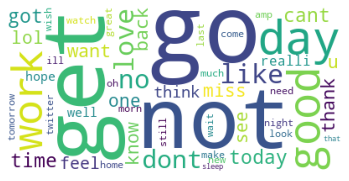

In [ ]:
#Wordcloud of 50 Most Frequent Words
mostFrequentWordsDict = {}
mostFrequentWords = sorted(total_count.items(), key=lambda x: x[1], reverse=True)[:50]
for key,freq in mostFrequentWords:
  mostFrequentWordsDict[dictionary[key]] = int(freq)
print(mostFrequentWordsDict)
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(mostFrequentWordsDict)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
#Least Frequently Used Words
leastFrequentWords = sorted(total_count.items(), key=lambda x: x[1])[:10]
for key,freq in leastFrequentWords:
  print(dictionary[key],freq)

muera 1
doucheclown 1
misslilli 1
manwa 1
samro 1
wwwdiigocomtautao 1
ugh92 1
coitu 1
nikster 1
shortsand 1


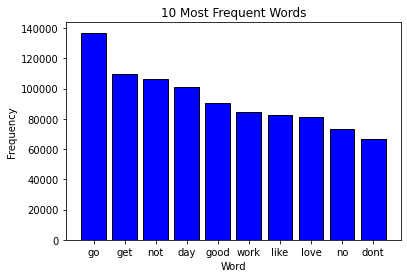

In [ ]:
#Histogram of Most Frequeny Words
mostFrequentWordsDictForHist = {}
mostFrequentWords = sorted(total_count.items(), key=lambda x: x[1], reverse=True)[:10]
for key,freq in mostFrequentWords:
  mostFrequentWordsDictForHist[dictionary[key]] = int(freq)

plt.bar(list(mostFrequentWordsDictForHist.keys()), mostFrequentWordsDictForHist.values(), color='blue',edgecolor='black',linewidth = 1)
plt.xlabel('Word')  
plt.ylabel('Frequency')  
# displaying the title 
plt.title("10 Most Frequent Words") 
plt.show()

In [ ]:
#Counting occurences of each class
print("Negative Tweets: ",scores.count(0))
print("Positive Tweets: ",scores.count(4))

Negative Tweets:  800000
Positive Tweets:  800000


# **Word2Vec**

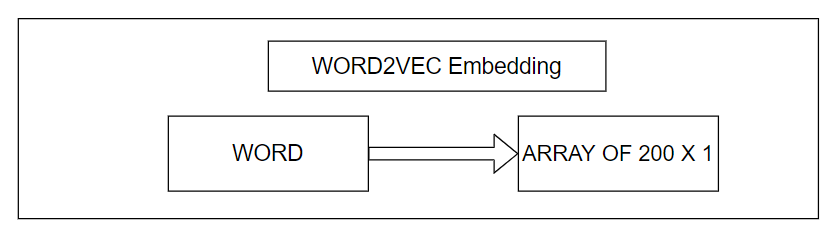

In [ ]:
#Load word2Vec Model
word2VecFromDrive = drive.CreateFile({'id':"1EgHkmSCftnyXc3oYt0lqrms0EcxPikdw"})
word2VecFromDrive.GetContentFile("twitter-word2Vecmodel.bin")
model = gensim.models.KeyedVectors.load_word2vec_format('twitter-word2Vecmodel.bin', binary = True)

In [ ]:
print(model["like"])

[ 0.27446085  0.28393978  0.0627973  -1.4727226   0.10887221  1.5861958
 -0.01004999 -1.7433872  -0.5114588   1.5241939  -0.14392005  1.1411222
  0.24365409  1.4109086  -1.0675565   1.8955675  -0.4243026   2.0626795
  0.12083013 -0.8586274   1.280823    0.49164274 -2.8671658  -3.3083417
  0.27052853 -1.353426    0.23942453  0.9313263  -0.93066543  1.6055784
 -1.5045382   0.586075    1.6013513  -1.2265114   1.7722442   0.61086124
  0.39623916  0.42449424 -2.421893    1.2900178   1.1275584   0.74374586
 -1.4561247   0.9920637   2.0802464   1.306161   -0.95341533  1.7340927
 -0.46060267  0.3695089   0.79251665 -0.2769872   1.0839126   1.588372
  0.15516812  0.00995102  0.18765227 -0.8451756   0.3448208   0.7203143
 -0.41347608 -0.8430425   0.29703417 -1.7068208   2.1743207   0.7664783
 -2.0794642   1.2204617  -0.15115143  2.6442137  -1.7079759   0.5296372
  0.38808087 -0.02475767  2.1844919  -0.47384232  0.09149828  0.8603156
 -2.82973     1.9398956  -2.3687792  -0.7736759  -0.18816939  0

In [ ]:
model.most_similar("hello")

[('hi', 0.7347922921180725),
 ('howdi', 0.5071665048599243),
 ('goodmorn', 0.4974186420440674),
 ('welcom', 0.49561095237731934),
 ('hellooo', 0.4770212173461914),
 ('quothelloquot', 0.47350502014160156),
 ('hiya', 0.4733026623725891),
 ('hey', 0.4688185453414917),
 ('quothiquot', 0.4686000347137451),
 ('ello', 0.46700116991996765)]

In [ ]:
model.wv.doesnt_match(['boy','guy','woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'woman'

In [ ]:
model.wv.doesnt_match(['king','prince','queen'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'queen'

In [ ]:
#Vocabulary of Word2Vec Model
vocabulary = list(model.wv.vocab)
print(len(vocabulary))

42468


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


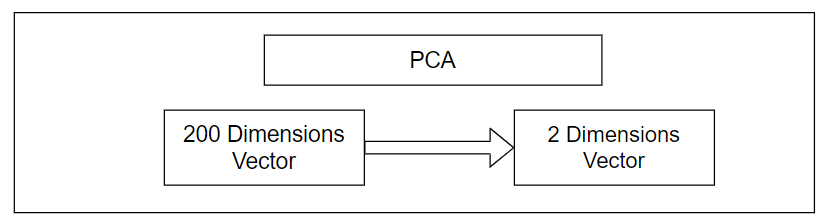

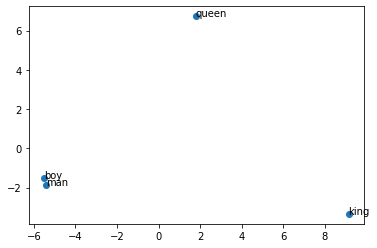

In [ ]:
#Plotting Word2Vec
testWords = ["king","man","queen","boy"]
X = model[testWords]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testWords):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
#Wor2Vec Vector of a Sentence
def getVector(sentence):
  count = 0
  result = np.zeros(100)
  sentence = sentence.split()
  if(len(sentence) <= 1):
    if(sentence[0] in vocabulary):
      result = model[sentence[0]]
    return result
  for word in sentence:
    if word in vocabulary:
      vector = model[word]
      result = result + vector
      count = count + 1
  if(count!=0):
    result = result/count
  return result

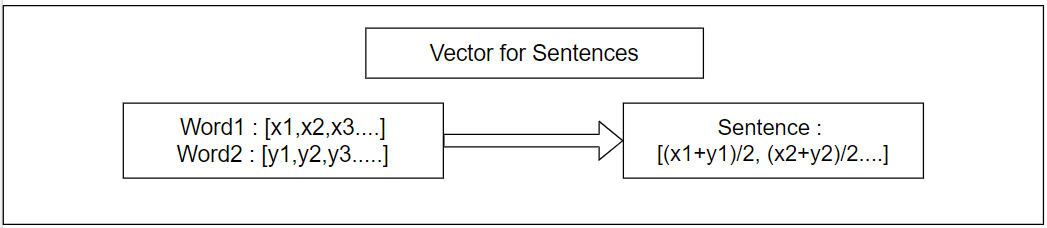

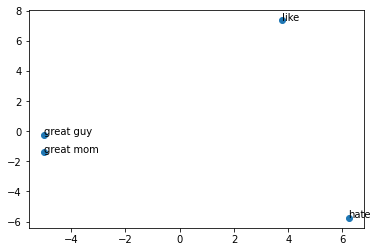

In [ ]:
#Plot Word2Vec Vectors of sentences 
testSentences = ["like", "hate","great guy","great mom"]
vectors = []
for s in testSentences:
  vectors.append(getVector(s))
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testSentences):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show() 

In [ ]:
l1 = model.wv.most_similar("great",topn = 1000)
print(l1)

[('fantast', 0.8493682146072388), ('awesom', 0.8024991750717163), ('good', 0.7678305506706238), ('fab', 0.7607250213623047), ('fabul', 0.7536301612854004), ('amaz', 0.73627769947052), ('excel', 0.7060789465904236), ('nice', 0.6889958381652832), ('brilliant', 0.6536471843719482), ('wonder', 0.6433250308036804), ('terrif', 0.6337637305259705), ('gr8', 0.6263760328292847), ('superb', 0.615442156791687), ('perfect', 0.6011314988136292), ('enjoy', 0.5994771718978882), ('spectacular', 0.5683002471923828), ('fun', 0.5548412203788757), ('outstand', 0.5456273555755615), ('horribl', 0.5397297143936157), ('beauti', 0.5357449650764465), ('fb', 0.5310803651809692), ('bad', 0.52813720703125), ('marvel', 0.5231111645698547), ('best', 0.5153359174728394), ('incred', 0.504845380783081), ('product', 0.502753496170044), ('brill', 0.4979802668094635), ('tough', 0.49577444791793823), ('first', 0.4921902120113373), ('rough', 0.4890655279159546), ('interest', 0.484580397605896), ('awsom', 0.48337042331695557

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
l2 = model.wv.most_similar("bad", topn = 1000)
print(l2)

[('good', 0.7154974341392517), ('horribl', 0.6753836870193481), ('terribl', 0.6307497620582581), ('shitti', 0.5831893086433411), ('crappi', 0.5649787783622742), ('great', 0.52813720703125), ('badli', 0.5154165625572205), ('weird', 0.5134620666503906), ('nasti', 0.5059009194374084), ('exactli', 0.49831491708755493), ('baaaad', 0.49353599548339844), ('wors', 0.4905160963535309), ('lousi', 0.4865182042121887), ('horrid', 0.4842495918273926), ('rough', 0.4824526309967041), ('worst', 0.4799725115299225), ('crummi', 0.47772181034088135), ('foul', 0.4641120433807373), ('sucki', 0.4565741717815399), ('stupid', 0.4555608928203583), ('pissi', 0.4525209665298462), ('upset', 0.4503888487815857), ('guilti', 0.4502222537994385), ('yucki', 0.43966785073280334), ('rotten', 0.4378742575645447), ('icki', 0.4354208707809448), ('sad', 0.4353482127189636), ('nice', 0.4273375868797302), ('odd', 0.42697247862815857), ('woe', 0.42399078607559204), ('goood', 0.42267653346061707), ('badit', 0.4220152795314789),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(list(model.wv.vocab.keys()))

['go', 'get', 'not', 'good', 'day', 'like', 'no', 'love', 'work', 'dont', 'cant', 'got', 'want', 'time', 'back', 'feel', 'miss', 'realli', 'one', 'know', 'thank', 'today', 'u', 'think', 'see', 'hope', 'still', 'new', 'need', 'make', 'watch', 'amp', 'well', 'oh', 'look', 'last', 'lol', 'come', 'night', 'home', 'wish', 'much', 'ill', 'great', 'that', 'wait', 'twitter', 'morn', 'didnt', 'tri', 'would', 'sleep', 'take', 'say', 'gonna', 'ive', 'happi', 'bad', 'tomorrow', 'haha', 'thing', 'way', 'sorri', 'follow', 'hate', 'even', 'sad', 'nice', 'could', 'week', 'fun', 'yeah', 'friend', 'your', 'start', 'right', 'peopl', 'bed', 'hey', 'next', 'play', 'better', 'let', 'tweet', 'never', 'tonight', 'school', 'use', 'hour', 'final', 'show', 'ye', 'littl', 'wanna', 'guy', 'first', 'long', 'wont', 'best', 'find', 'awesom', 'keep', 'anoth', 'alway', 'everyon', 'sure', 'call', 'weekend', 'ok', 'head', 'tire', 'pleas', 'movi', 'readi', 'made', 'ur', 'lot', 'doesnt', 'eat', 'went', 'live', 'rain', 'don

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:5000]]

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:5000]

plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.050s...
[t-SNE] Computed neighbors for 5000 samples in 5.852s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.288813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.725021
[t-SNE] KL divergence after 1000 iterations: 2.270525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [ ]:
m1 = list(model.most_similar("great",topn = 200))
print(m1)

[('fantast', 0.8493682146072388), ('awesom', 0.8024991750717163), ('good', 0.7678305506706238), ('fab', 0.7607250213623047), ('fabul', 0.7536301612854004), ('amaz', 0.73627769947052), ('excel', 0.7060789465904236), ('nice', 0.6889958381652832), ('brilliant', 0.6536471843719482), ('wonder', 0.6433250308036804), ('terrif', 0.6337637305259705), ('gr8', 0.6263760328292847), ('superb', 0.615442156791687), ('perfect', 0.6011314988136292), ('enjoy', 0.5994771718978882), ('spectacular', 0.5683002471923828), ('fun', 0.5548412203788757), ('outstand', 0.5456273555755615), ('horribl', 0.5397297143936157), ('beauti', 0.5357449650764465), ('fb', 0.5310803651809692), ('bad', 0.52813720703125), ('marvel', 0.5231111645698547), ('best', 0.5153359174728394), ('incred', 0.504845380783081), ('product', 0.502753496170044), ('brill', 0.4979802668094635), ('tough', 0.49577444791793823), ('first', 0.4921902120113373), ('rough', 0.4890655279159546), ('interest', 0.484580397605896), ('awsom', 0.48337042331695557

In [ ]:
m2 = list(model.most_similar("hate",topn =200))
print(m2)

[('stupid', 0.6157627701759338), ('despis', 0.6149724721908569), ('dislik', 0.5856581926345825), ('suck', 0.5781062841415405), ('h8', 0.5497258305549622), ('fuck', 0.5252393484115601), ('curs', 0.524296224117279), ('ugh', 0.5227382779121399), ('ughh', 0.5184893012046814), ('annoy', 0.5090035796165466), ('fml', 0.5086206793785095), ('grrr', 0.4875236749649048), ('irrit', 0.4825500249862671), ('love', 0.46995705366134644), ('rawr', 0.4685702919960022), ('grr', 0.464787095785141), ('ridicul', 0.4646735191345215), ('eff', 0.45521771907806396), ('ew', 0.45110100507736206), ('loath', 0.449226438999176), ('frustrat', 0.4484074115753174), ('mean', 0.44633281230926514), ('piss', 0.4449939429759979), ('swear', 0.43950289487838745), ('ughhhh', 0.43479907512664795), ('dumb', 0.4334631562232971), ('screw', 0.4310399889945984), ('gah', 0.4299160838127136), ('threaten', 0.4289567172527313), ('ftl', 0.4279738664627075), ('especi', 0.42741188406944275), ('whyyi', 0.4259597659111023), ('argh', 0.4244158

In [ ]:
vectors = []
words = []
for i in m1:
  vectors.append(model[i[0]])
  words.append(i[0])
for i in m2:
  vectors.append(model[i[0]])
  words.append(i[0])
print(len(words))

400


In [ ]:
print(len(colors))

200


In [ ]:
from bokeh.transform import factor_cmap, factor_mark
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="Positive and Negative Words",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)


from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(vectors)

tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = words

plot_tfidf.scatter(x='x', y='y', source=tsne_df,  fill_alpha=0.6)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [ ]:
colors = [[135,229,157] for i in range(0,200)]
colors.extend([[255,100,100] for i in range(0,200)])
tsne_df['color'] = colors
tsne_df['radius'] = [0.5 for i in range(0,400)]

plot_tfidf.scatter(x='x', y='y', source=tsne_df, color = 'color', fill_alpha=0.6, radius = 'radius', 
          line_color=None)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [ ]:
#Load cleaned Tweets
tweetsFromDrive = drive.CreateFile({'id':"1EE4DmlsZDGaJTb7eKHT8i9KxKGcu3QBm"})
tweetsFromDrive.GetContentFile("twitter-corpus.csv")


In [ ]:
tweets = []
with open('twitter-corpus.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    tweets = list(csv_reader)
print(tweets[0])

#Load scores of Tweets
scores = []
scoresFromDrive = drive.CreateFile({'id':"12MoUaS97ngNlhfrydOqwc7AJI1LUOWxf"})
scoresFromDrive.GetContentFile("twitter-scores.csv")
with open('twitter-scores.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    scores = list(csv_reader)
    scores = scores[0]
print(scores[0])
for i in range(0,len(scores)):
  scores[i] = int(scores[i])

['awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
0


# Elmo Embedding

In [ ]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
embeddings = elmo(["hello"], signature="default", as_dict=True)["elmo"]
print(embeddings)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tensor("module_apply_default/aggregation/mul_3:0", shape=(1, ?, 1024), dtype=float32)


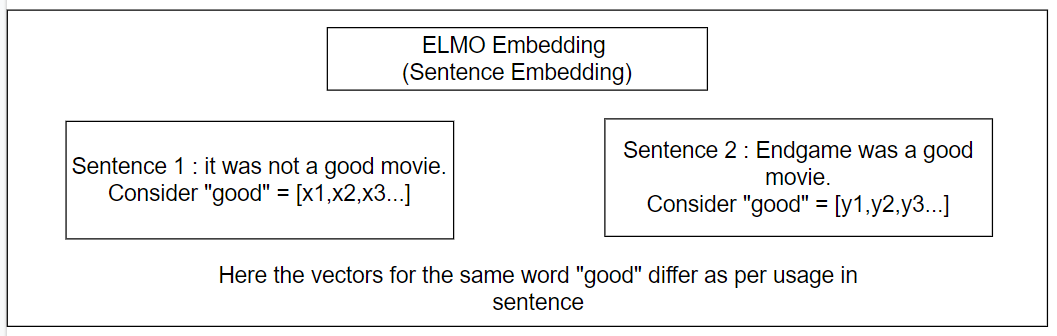

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [ ]:
def elmo_vectors_single(x):
  embeddings = elmo(x, signature="default", as_dict=True)["elmo"]
  return embeddings

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))
print(elmo_vectors(["Hello hi","hello hi"]).shape)

In [ ]:
print(cosine(elmo_vectors(["good"]), elmo_vectors(["bad"])))

In [ ]:
x = ["it was not bad but good"]
y = ["it was not good but bad"]
x_embeddings = elmo(x, signature="default", as_dict=True)["elmo"]
y_embeddings = elmo(y, signature="default", as_dict=True)["elmo"]
print(x_embeddings.shape)
print(y_embeddings.shape)
print(x_embeddings)
print((sess.run(x_embeddings)))
print(sess.run(x_embeddings).shape)
X = sess.run(x_embeddings).reshape(x_embeddings.shape[1], x_embeddings.shape[2])
print(X.shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 6, 1024)
(1, 6, 1024)
Tensor("module_apply_default_2/aggregation/mul_3:0", shape=(1, 6, 1024), dtype=float32)
[[[-0.5650216  -0.66118854  0.20086831 ... -0.37023297  0.3984671
   -0.02420831]
  [-0.19441596 -0.56032044  0.16293323 ... -0.34249267  1.0793211
    0.43090063]
  [-0.26801935 -0.22719972  0.03482752 ... -0.0785855   0.42486507
    0.19113134]
  [ 0.680528   -0.09931272  0.688828   ... -0.87757915  0.8524045
   -0.45884192]
  [ 0.14620888 -0.02105612  0.01683013 ... -0.5269397   0.61282337
    0.32720834]
  [ 0.47621274 -0.48373622  0.39784652 ...  0.12559403  0.36246964
    0.14159201]]]
(1, 6, 1024)
(6, 1024)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


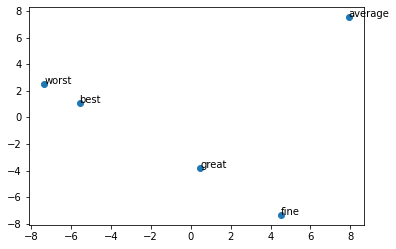

In [ ]:
testSentences = ["best","average", "worst", "fine","great"]
vectors = []
for s in testSentences:
  vectors.append(elmo_vectors([s]))
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testSentences):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show() 

In [ ]:
print(elmo_vectors(["Roasted ants are a popular snack in Columbia"]).shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 8, 1024)


In [ ]:
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[x_max_len])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

In [ ]:
i = 0
for i in range(0,len(tweets)):
  tweets[i] = " ".join(tweets[i])
print(tweets[0])


awww that bummer shoulda got david carr third day


In [ ]:
list_train = [tweets[i:i+100] for i in range(0,len(tweets),100)]

In [ ]:
print(list_train[0])
print(len(list_train[0]))
print(len(list_train))

['awww that bummer shoulda got david carr third day', 'upset cant updat facebook text might cri result school today also blah', 'dive mani time ball manag save rest go bound', 'whole bodi feel itchi like fire', 'no not behav mad cant see', 'not whole crew', 'need hug', 'hey long time no see ye rain bit bit lol fine thank how', 'nope didnt', 'que muera', 'spring break plain citi snow', 'repierc ear', 'couldnt bear watch thought ua loss embarrass', 'count idk either never talk anymor', 'wouldv first didnt gun not realli though zac snyder doucheclown', 'wish got watch miss premier', 'holli death scene hurt sever watch film wri director cut not', 'file tax', 'ahh ive alway want see rent love soundtrack', 'oh dear drink forgotten tabl drink', 'day didnt get much done', 'one friend call ask meet mid valley todaybut ive no time sigh', 'bake cake ate', 'week not go hope', 'blagh class tomorrow', 'hate call wake peopl', 'go cri sleep watch marley', 'sad misslilli', 'ooooh lol lesli ok wont lesl

In [ ]:
print(tweets[1])

upset cant updat facebook text might cri result school today also blah


In [ ]:
print(len(elmo_train))

208


In [ ]:
list_train = [tweets[i:i+100] for i in range(0,len(tweets),100)]

In [ ]:
print(list_train[0])

['awww that bummer shoulda got david carr third day', 'upset cant updat facebook text might cri result school today also blah', 'dive mani time ball manag save rest go bound', 'whole bodi feel itchi like fire', 'no not behav mad cant see', 'not whole crew', 'need hug', 'hey long time no see ye rain bit bit lol fine thank how', 'nope didnt', 'que muera', 'spring break plain citi snow', 'repierc ear', 'couldnt bear watch thought ua loss embarrass', 'count idk either never talk anymor', 'wouldv first didnt gun not realli though zac snyder doucheclown', 'wish got watch miss premier', 'holli death scene hurt sever watch film wri director cut not', 'file tax', 'ahh ive alway want see rent love soundtrack', 'oh dear drink forgotten tabl drink', 'day didnt get much done', 'one friend call ask meet mid valley todaybut ive no time sigh', 'bake cake ate', 'week not go hope', 'blagh class tomorrow', 'hate call wake peopl', 'go cri sleep watch marley', 'sad misslilli', 'ooooh lol lesli ok wont lesl

In [ ]:
#Counting occurences of each class
print("Negative Tweets: ",scores.count(0))
print("Positive Tweets: ",scores.count(4))

Negative Tweets:  800000
Positive Tweets:  800000


# **Algorithms**

In [ ]:
tv = TfidfVectorizer(ngram_range=(1,3),max_features=20000,stop_words='english') 
X = tv.fit_transform(tweets)


### **Naive Bayes**

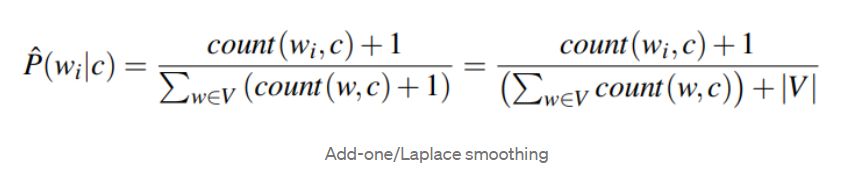

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, scores,
                                               test_size = 0.2, shuffle=True)

nb = MultinomialNB(alpha=6.5, fit_prior=False)
nb.fit(Xtrain,ytrain)
pred = nb.predict(Xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.7619125
[[122632  37652]
 [ 38536 121180]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76    160284
           4       0.76      0.76      0.76    159716

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [ ]:
nb = MultinomialNB(alpha=1.5, fit_prior=False)
nb.fit(Xtrain,ytrain)
pred = nb.predict(Xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.702
[[120122  39228]
 [ 41071 119579]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70    156850
           4       0.70      0.75      0.70    163150

    accuracy                           0.70    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.70      0.70    320000



In [ ]:
nb = MultinomialNB(alpha=3.5, fit_prior=False)
nb.fit(Xtrain,ytrain)
pred = nb.predict(Xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.7152
[[121102  38248]
 [ 40091 120559]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.71    159350
           4       0.71      0.75      0.71    160650

    accuracy                           0.71    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.71      0.71    320000



In [ ]:
filename = 'nb-twitter.sav'
pickle.dump(nb, open(filename, 'wb'))

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_)
text_vector = vector.transform(["i dont like you"])
nb.predict(text_vector)

array([0])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["i like you"])
nb.predict(text_vector)

array([4])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["you are great!"])
nb.predict(text_vector)

array([4])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["you are bad!"])
nb.predict(text_vector)

array([0])

### **SVM : Word2Vec** 

In [ ]:
svm = SVC(kernel='linear')
svm.fit(Xtrain[:10000],ytrain[:10000])


In [ ]:
svm = pickle.load(open("/content/svm-twitter-II.sav", 'rb'))
pred = svm.predict(Xtest)
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.765365625
[[123078  37206]
 [ 37877 121839]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77    160284
           4       0.77      0.76      0.76    159716

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [ ]:
filename = 'svm-twitter-II.sav'
pickle.dump(nb, open(filename, 'wb'))

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["it was very good"])
svm.predict(text_vector)

array([4])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["it was worst"])
svm.predict(text_vector)

array([0])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["i will kill you"])
svm.predict(text_vector)

array([0])

In [ ]:
vector = CountVectorizer(vocabulary=tv.vocabulary_) 
text_vector = vector.transform(["it was worst"])
svm.predict(text_vector)

### **Clustering - KMeans**

In [ ]:
clustering_model = KMeans(n_clusters=2, max_iter=10000, random_state=True, n_init=150).fit(X=model.vectors)

In [ ]:
init = np.array([model["like"],model["hate"]])

In [ ]:
clustering_model = KMeans(n_clusters=2, max_iter=10000, random_state=True, n_init=1, init = init).fit(X=model.vectors)

In [ ]:
filename = 'kmeans-twitter.sav'
pickle.dump(nb, open(filename, 'wb'))

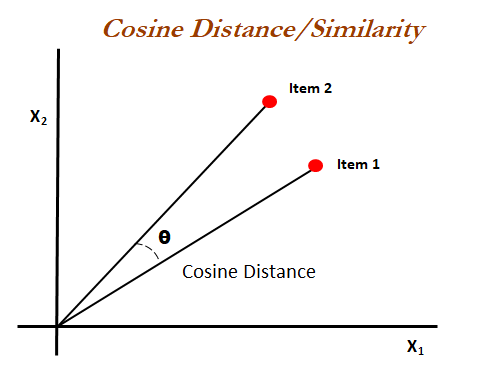

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
print(cosine(model["good"],model["not"]))

0.13606627


In [ ]:
print(cosine(model["like"],model["hate"]))

0.34002325


In [ ]:
model.similar_by_vector(clustering_model.cluster_centers_[0], topn=10, restrict_vocab=None)

[('great', 1.0),
 ('fantast', 0.8493682146072388),
 ('awesom', 0.8024991750717163),
 ('good', 0.7678305506706238),
 ('fab', 0.7607250213623047),
 ('fabul', 0.7536301612854004),
 ('amaz', 0.73627769947052),
 ('excel', 0.7060789465904236),
 ('nice', 0.6889958381652832),
 ('brilliant', 0.6536471843719482)]

In [ ]:
model.similar_by_vector(clustering_model.cluster_centers_[1], topn=10, restrict_vocab=None)

[('hate', 1.0),
 ('stupid', 0.6157627701759338),
 ('despis', 0.6149724721908569),
 ('dislik', 0.5856581926345825),
 ('suck', 0.5781063437461853),
 ('h8', 0.5497258305549622),
 ('fuck', 0.5252393484115601),
 ('curs', 0.5242961645126343),
 ('ugh', 0.5227383375167847),
 ('ughh', 0.5184893012046814)]

In [ ]:
m1 = list(model.similar_by_vector(clustering_model.cluster_centers_[0], topn=500, restrict_vocab=None))
print(m1)

[('great', 1.0), ('fantast', 0.8493682146072388), ('awesom', 0.8024991750717163), ('good', 0.7678305506706238), ('fab', 0.7607250213623047), ('fabul', 0.7536301612854004), ('amaz', 0.73627769947052), ('excel', 0.7060789465904236), ('nice', 0.6889958381652832), ('brilliant', 0.6536471843719482), ('wonder', 0.6433250308036804), ('terrif', 0.6337637305259705), ('gr8', 0.6263760328292847), ('superb', 0.615442156791687), ('perfect', 0.6011314988136292), ('enjoy', 0.5994771718978882), ('spectacular', 0.5683002471923828), ('fun', 0.5548412203788757), ('outstand', 0.5456273555755615), ('horribl', 0.5397297143936157), ('beauti', 0.5357449650764465), ('fb', 0.5310803651809692), ('bad', 0.52813720703125), ('marvel', 0.5231111645698547), ('best', 0.5153359174728394), ('incred', 0.504845380783081), ('product', 0.502753496170044), ('brill', 0.4979802668094635), ('tough', 0.49577444791793823), ('first', 0.4921902120113373), ('rough', 0.4890655279159546), ('interest', 0.484580397605896), ('awsom', 0.4

In [ ]:
m2 = list(model.similar_by_vector(clustering_model.cluster_centers_[1], topn=500, restrict_vocab=None))
print(m2)

[('hate', 1.0), ('stupid', 0.6157627701759338), ('despis', 0.6149724721908569), ('dislik', 0.5856581926345825), ('suck', 0.5781063437461853), ('h8', 0.5497258305549622), ('fuck', 0.5252393484115601), ('curs', 0.5242961645126343), ('ugh', 0.5227383375167847), ('ughh', 0.5184893012046814), ('annoy', 0.5090035796165466), ('fml', 0.5086206793785095), ('grrr', 0.4875236749649048), ('irrit', 0.4825500249862671), ('love', 0.46995705366134644), ('rawr', 0.4685702919960022), ('grr', 0.464787095785141), ('ridicul', 0.46467354893684387), ('eff', 0.45521771907806396), ('ew', 0.45110100507736206), ('loath', 0.449226438999176), ('frustrat', 0.4484074115753174), ('mean', 0.44633281230926514), ('piss', 0.4449939727783203), ('swear', 0.43950289487838745), ('ughhhh', 0.43479907512664795), ('dumb', 0.4334631860256195), ('screw', 0.4310400187969208), ('gah', 0.4299160838127136), ('threaten', 0.4289567470550537), ('ftl', 0.4279738664627075), ('especi', 0.42741188406944275), ('whyyi', 0.4259597659111023), (

In [ ]:
vectors = []
words = []
for i in m1:
  vectors.append(model[i[0]])
  words.append(i[0])
for i in m2:
  vectors.append(model[i[0]])
  words.append(i[0])
print(len(words))

1000


In [ ]:
print(cosine(model["good"],model["bad"]))

0.71549743


In [ ]:
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.6821
[[118099  42123]
 [ 42915 116863]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.63    110165
           4       0.63      0.63      0.63    209835

    accuracy                           0.68    320000
   macro avg       0.68      0.68      0.68    320000
weighted avg       0.65      0.65      0.63    320000



In [ ]:
clustering_model = KMeans(n_clusters=2, max_iter=5000, random_state=True, n_init=35).fit(X=model.vectors)
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.5975
[[114022  45328]
 [ 47171 113479]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57    155150
           4       0.57      0.75      0.57    162350

    accuracy                           0.57    320000
   macro avg       0.60      0.62      0.62    320000
weighted avg       0.62      0.62      0.60    320000



In [ ]:
clustering_model = KMeans(n_clusters=2, max_iter=7000, random_state=True, n_init=45).fit(X=model.vectors)
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.5805
[[113923  45427]
 [ 47270 113380]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.55    150130
           4       0.55      0.75      0.55    162470

    accuracy                           0.55    320000
   macro avg       0.59      0.59      0.59    320000
weighted avg       0.59      0.58      0.58    320000



In [ ]:
from bokeh.transform import factor_cmap, factor_mark
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="Positive and Negative Words",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)


from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(vectors)

tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = words

plot_tfidf.scatter(x='x', y='y', source=tsne_df,  fill_alpha=0.6)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [ ]:
colors = [[135,229,157] for i in range(0,500)]
colors.extend([[255,100,100] for i in range(0,500)])
tsne_df['color'] = colors
tsne_df['radius'] = [0.8 for i in range(0,1000)]

plot_tfidf.scatter(x='x', y='y', source=tsne_df, color = 'color', fill_alpha=0.6, radius = 'radius', 
          line_color=None)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [ ]:
def getSentiment(sentence):
  c1 = clustering_model.cluster_centers_[0]
  c2 = clustering_model.cluster_centers_[1]
  s1 = cosine(c1,getVector(sentence))
  s2 = cosine(c2,getVector(sentence))
  if(s1<s2):
    print("Negative Sentiment")
  else:
    print("Positive Sentiment")

In [ ]:
getSentiment("i hate you")

Negative Sentiment


In [ ]:
getSentiment("Endgame was one of the greatest movies of all time!")

Positive Sentiment


In [ ]:
getSentiment("Endgame was the worst film!")

Negative Sentiment


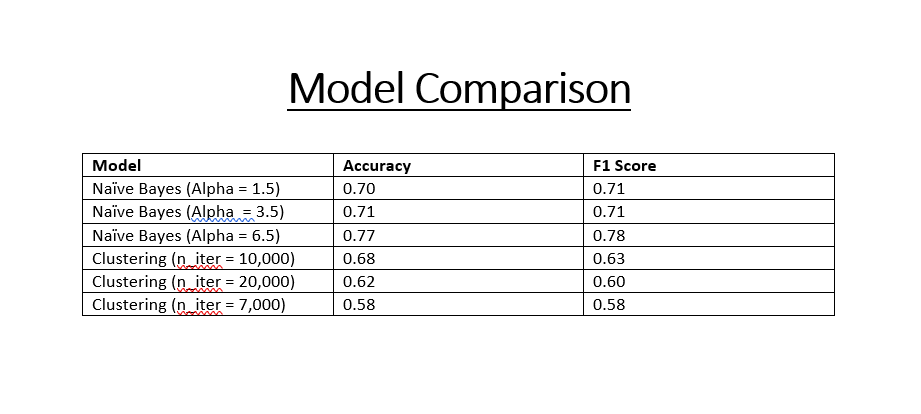

# **API**

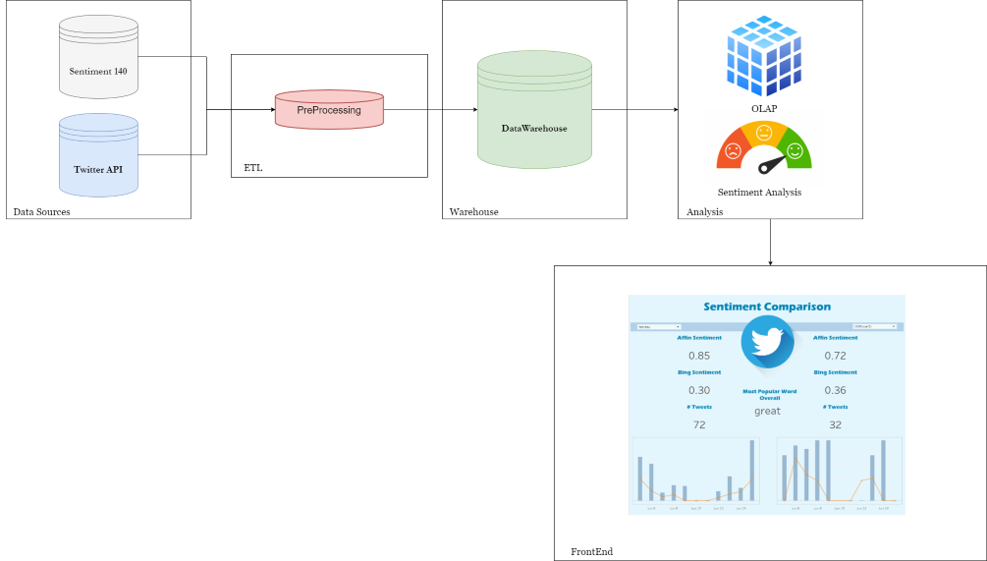